In [ ]:
#delete folder 
%rm -rf /content/test


In [ ]:
#convert to JPG
from PIL import Image
import os
import glob
import cv2
j=0
for i in glob.glob("/...path.../*.*"):
  j=j+1
  im = Image.open(i)
  rgb_im = im.convert("RGB")
  rgb_im.save("/...path.../" + str(j) + ".jpg")

In [ ]:
#gabor function
import glob
from pathlib import Path
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 32):
        params = {'ksize':(ksize, ksize), 'sigma':1.0, 'theta':theta, 'lambd':15.0,
                  'gamma':0.02, 'psi':0, 'ktype':cv2.CV_32F}
        kern = cv2.getGaborKernel(**params)
        kern /= 1.5*kern.sum()
        filters.append((kern,params))
    return filters

def process(img, filters):
    accum = np.zeros_like(img)
    for kern,params in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

In [ ]:
#gabor on batch ^run above cell first
filters = build_filters()
i=0
for img in glob.glob("/...path.../*.jpg"):
  n= cv2.imread(img)
  i=i+1
  #plt.imshow(n)
  a=process(n, filters)
  #plt.imshow(a)
  cv2.imwrite("/...path.../" + str(i) + "_gabor.jpg", a)

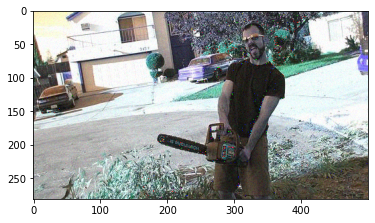

In [ ]:
#gaussian noise and speckle noise code - 
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt


def sp_noise(image, prob):
    """
     add salt and pepper noise 
    prob: noise ratio 
    """
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


def gasuss_noise(image, mean=0, var=0.001):
    """
         add gaussian noise 
        mean :  mean value 
        var :  variance 
    """
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    return out


src = cv.imread("/...path.../image.jpg")
img = src.copy()

#  call noise function 
#img_sp = sp_noise(img, prob=0.02)  #  the noise ratio is 0. 02
img_gauss = gasuss_noise(img, mean=0, var=0.001)  #  the mean is 0 and the variance is 0.01

#  display image 
#plt.imshow("src", img)
#cv.imshow("sp", img_sp)
plt.imshow(img_gauss)


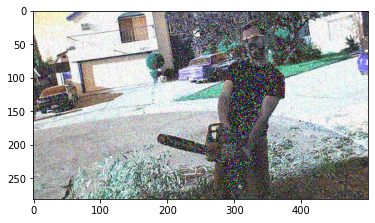

In [ ]:
img_gauss = gasuss_noise(img, mean=0, var=0.01)
plt.imshow(img_gauss)


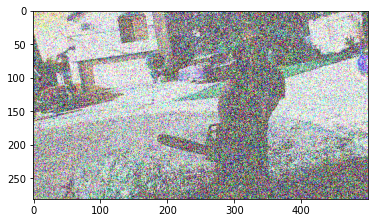

In [ ]:
img_gauss = gasuss_noise(img, mean=0, var=0.1)
plt.imshow(img_gauss)

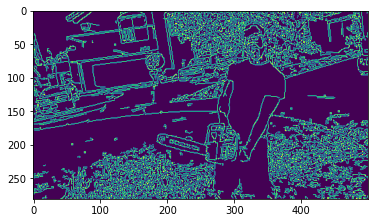

In [ ]:
#extract edges - matplotlib seems to display black and white images with yellow/blue shades, but if the images are seen in the actual folder (outside the code) then the images appear with the correct colouring, in this case black background with white edges 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline
#read the image
image = cv2.imread('/...path.../image.jpg') 
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
inverted_image = np.invert(edges)
plt.imshow(edges)

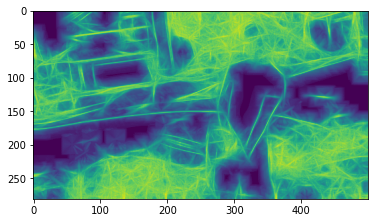

In [ ]:
filters = build_filters()
a=process(edges, filters)
plt.imshow(a)

In [ ]:
#edges dataset +gabor filter
import os
import glob
import cv2
j=0
filters = build_filters()

for i in glob.glob("/...path.../*.jpg"):
  j=j+1
  image = cv2.imread(i) 
  edges = cv2.Canny(image,100,200) 
  a=process(edges, filters)
  cv2.imwrite("/...path.../" + str(j) + "_edges_gabor.jpg", a)

In [ ]:
#noise filter +gabor
import os
import glob
import cv2
j=0
filters = build_filters()

for i in glob.glob("/...path.../*.jpg"):
  j=j+1
  src = cv2.imread(i) 
  img=src.copy()
  img_gauss = gasuss_noise(img, mean=0, var=0.001) #change the variance value to increase or decrease the amount of noise
  #a=process(img_gauss, filters)
  cv2.imwrite("/...path.../" + str(j) + "_noise1.jpg", img_gauss)